# Space plots !

This notebook comes with a blog post, go check it out : **alelouis.github.io**

In [1]:
%matplotlib inline
import math
import ephem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load up the stars locations and satellites TLEs

In [2]:
stars = np.genfromtxt('stardata.csv', delimiter=',')
satellites = open('satellites.txt').read().splitlines()

Next create an observer, specifying it position in Latitude / Longitude

In [3]:
toulouse = ephem.Observer()
toulouse.lat, toulouse.lon = '43.598', '1.4447'

Next we can create one function that returns the azimuth and altitude of the traces of all TLEs specified in satellites.txt

In [4]:
def make_satellites(satellites, observer):
    ite = 50
    satellites_iter = 0
    orbit_tracer = observer.copy()
    for satellites_iter in range(0, len(satellites)/3):
        az  = np.empty((ite, len(satellites)/3))
        alt = np.empty((ite, len(satellites)/3))
        satellite_temp = ephem.readtle(satellites[satellites_iter*3], satellites[satellites_iter*3+1], satellites[satellites_iter*3+2])
        for i in range(0,ite):
            orbit_tracer.date += 10*ephem.second
            satellite_temp.compute(orbit_tracer)
            az[i, satellites_iter] = satellite_temp.az
            alt[i, satellites_iter] = 90 - math.degrees(satellite_temp.alt)
    return az, alt

We also make a function that return the azimuth and altitude of the stars for a given observer.
We put a condition an magnitude to avoid displaying every star.

In [5]:
def make_stars(stars, observer):
    temp_star =  ephem.FixedBody()
    star_number = 0
    stars_az  = np.empty(stars.shape[0])
    stars_alt = np.empty(stars.shape[0])
    stars_mag = np.empty(stars.shape[0])
    for star in stars:
        if star[2] > 9:
            temp_star._ra = star[0]
            temp_star._dec = np.radians(star[1])
            temp_star.compute(observer)
            stars_az[star_number] =  temp_star.az
            stars_alt[star_number] = 90 - math.degrees(temp_star.alt)
            stars_mag[star_number] = (star[2]-9)/3
        else:
            stars_mag[star_number] = 0
        star_number += 1
    return stars_az, stars_alt, stars_mag

We then choose a date of observation and set it to the observer.

In [6]:
init_date = '2018/2/28 05:11:00'
toulouse.date = init_date

We compute the positions of stars and satellites for the observer

In [7]:
az_stars, alt_stars, mag_stars = make_stars(stars, toulouse)
az_sat, alt_sat = make_satellites(satellites, toulouse)

And finaly plot it using Matplotlib. We define a polar plot and customize it.

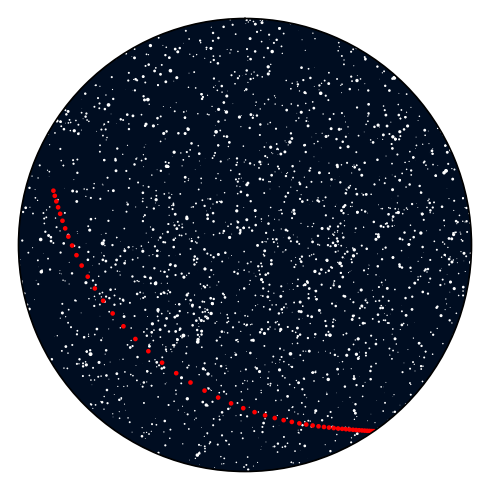

In [8]:
fig = plt.figure(figsize=(4,4), dpi = 150)
ax = fig.add_subplot(111, projection = 'polar')
ax.set_rlim(0,90)
ax.set_xticks(np.arange(0,2*np.pi,np.pi/2))
ax.set_theta_zero_location("N")
ax.set_theta_direction(1)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('#000d21')
scat = ax.scatter(az_stars, alt_stars, s = mag_stars, c = 'white', edgecolors='none')
orbits = list()
for i in range(0, len(satellites)/3):
    if alt_sat[:,i].any() > 0:
        orbits.append(ax.scatter(az_sat[:,i], alt_sat[:,i], s = 5, edgecolors='none', c = 'red'))